In [1]:
from pysces import *
import matplotlib.pyplot as plt
from matplotlib.mlab import psd
import numpy as np
from numpy import *
from pylab import *

### Airfoil defination

In [2]:
angle = 0
airfoil = naca_airfoil("0012", 200, zero_thick_te=True)  
#airfoil = TransformedBody(airfoil, displacement=(-0.25, 0))
airfoil = TransformedBody(airfoil, angle)
bound = BoundVortices(airfoil)

### number of steps, freestream velocity, step-size

In [3]:
num_steps = 100
Uinfty = (1,0)
dt = 0.01
Vortices.core_radius = dt

### free vortices

In [6]:
v1 = (-5, 0.1)
s1 = 0.810137
vort = Vortices([v1],[s1])

### solver

In [7]:
flow = ExplicitEuler(dt, Uinfty, bound, wake=vort, need_force='wake_impulse')


for i in range(1,num_steps):
    flow.advance()

#plot force
f = flow.force
steps = np.arange(0, num_steps*dt, dt)
expected_Cl = (np.pi * np.pi / 90) * angle
expected = np.array([expected_Cl, expected_Cl])
steps2 = np.array([0, num_steps*dt])

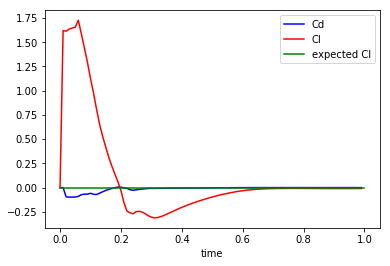

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(steps, 2*f[:,0], c='b', label='Cd')
ax1.plot(steps, 2*f[:,1], c='r', label='Cl')
ax1.plot(steps2, expected, c='g', label='expected Cl')
plt.legend();
plt.xlabel('time')
#plt.grid(True)
# plt.savefig('Tu_038_GA.pdf')
plt.show()

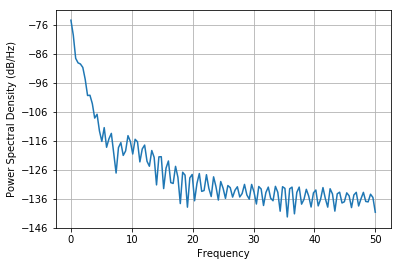

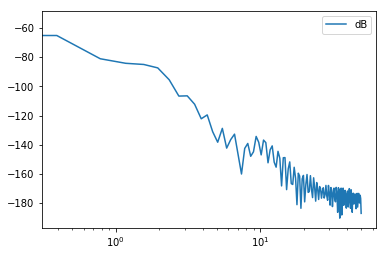

In [11]:
def Curles_loadingNoise(y_int,c_sound,r_dist,L,dt):
	p_acoustic = (y_int)/(4*np.pi*c_sound*(r_dist**2)) * (L/dt)
	return p_acoustic

noise = Curles_loadingNoise(1, 343, 3, 2*f[:,1],dt)

def L_p(x):
	return 20*np.log10(np.abs(x)/2.e-5)

(werte,freq) = psd(noise,Fs=1/dt,detrend='mean')
pegel=L_p(werte)
fig = plt.figure()
plt.semilogx(freq,pegel,label='dB')
plt.legend()
